In [1]:
import os
import numpy as np
import polars as pl


In [2]:
root_path = '/cpfs01/projects-HDD/cfff-6f3a36a0cd1e_HDD/public/protein/datasets/AF3/data/pdb_data/data_caches'
file_name_list = ["train_clusterings" , "val_clusterings","test_clusterings"]
csv_name_list = [
    "protein_chain_cluster_mapping.csv",
    "ligand_chain_cluster_mapping.csv",
    "nucleic_acid_chain_cluster_mapping.csv",
    "peptide_chain_cluster_mapping.csv",
    "interface_cluster_mapping.csv"
]

res = {}
for file_name in file_name_list:
    file_dir_path = os.path.join(root_path,file_name)

    tmp_res={}
    all_mmcif = []
    for csv_name in csv_name_list:
        csv_path = os.path.join(file_dir_path,csv_name)
        df = pl.read_csv(csv_path)
        unique_pdb_ids = df["pdb_id"].unique().to_list()
        tmp_res[csv_name.split('_')[0]]=len(unique_pdb_ids)
        all_mmcif+=unique_pdb_ids
    tmp_res['total'] = len(set(all_mmcif))
    print(file_name.split("_")[0],':',tmp_res)
    res[file_name.split("_")[0]] = tmp_res

train : {'protein': 140970, 'ligand': 96640, 'nucleic': 12158, 'peptide': 5000, 'interface': 80245, 'total': 148339}
val : {'protein': 1301, 'ligand': 3772, 'nucleic': 575, 'peptide': 275, 'interface': 784, 'total': 5151}
test : {'protein': 1351, 'ligand': 21, 'nucleic': 501, 'peptide': 75, 'interface': 1242, 'total': 1758}


In [ ]:
out_put_file_path = '/cpfs01/projects-HDD/cfff-6f3a36a0cd1e_HDD/public/protein/datasets/AF3/data/pdb_data/data_caches/200_mmcif'
N = 100
all_mmcif = []
for csv_name in csv_name_list:
    csv_path = os.path.join(file_dir_path, csv_name)
    # 读取CSV文件
    df = pl.read_csv(csv_path)
    print(csv_name,len(df))
    df_head = df.head(N)
    unique_pdb_ids = df_head["pdb_id"].unique().to_list()
    all_mmcif +=unique_pdb_ids

print('pdb_id number:',len(set(all_mmcif)))
print(set(all_mmcif))
all_mmcif = set(all_mmcif)

for csv_name in csv_name_list:
    csv_path = os.path.join(file_dir_path, csv_name)
    # 读取CSV文件
    df = pl.read_csv(csv_path)

    # 过滤出 pdb_id 在 selected_pdb_ids 中的行
    filtered_df = df.filter(pl.col("pdb_id").is_in(all_mmcif))

    # 保存当前文件的过滤结果到一个新的CSV文件中W
    output_file = os.path.join(out_put_file_path, f"{csv_name}")
    filtered_df.write_csv(output_file)
    print(f"saving: {output_file} \n length:{len(filtered_df)}")

In [3]:
res

{'train': {'protein': 140970,
  'ligand': 96640,
  'nucleic': 12158,
  'peptide': 5000,
  'interface': 80245,
  'total': 148339},
 'val': {'protein': 1301,
  'ligand': 3772,
  'nucleic': 575,
  'peptide': 275,
  'interface': 784,
  'total': 5151},
 'test': {'protein': 1351,
  'ligand': 21,
  'nucleic': 501,
  'peptide': 75,
  'interface': 1242,
  'total': 1758}}

/tmp/ipykernel_7349/3208805905.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette='pastel', ax=axes[idx])
/tmp/ipykernel_7349/3208805905.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette='pastel', ax=axes[idx])
/tmp/ipykernel_7349/3208805905.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette='pastel', ax=axes[idx])


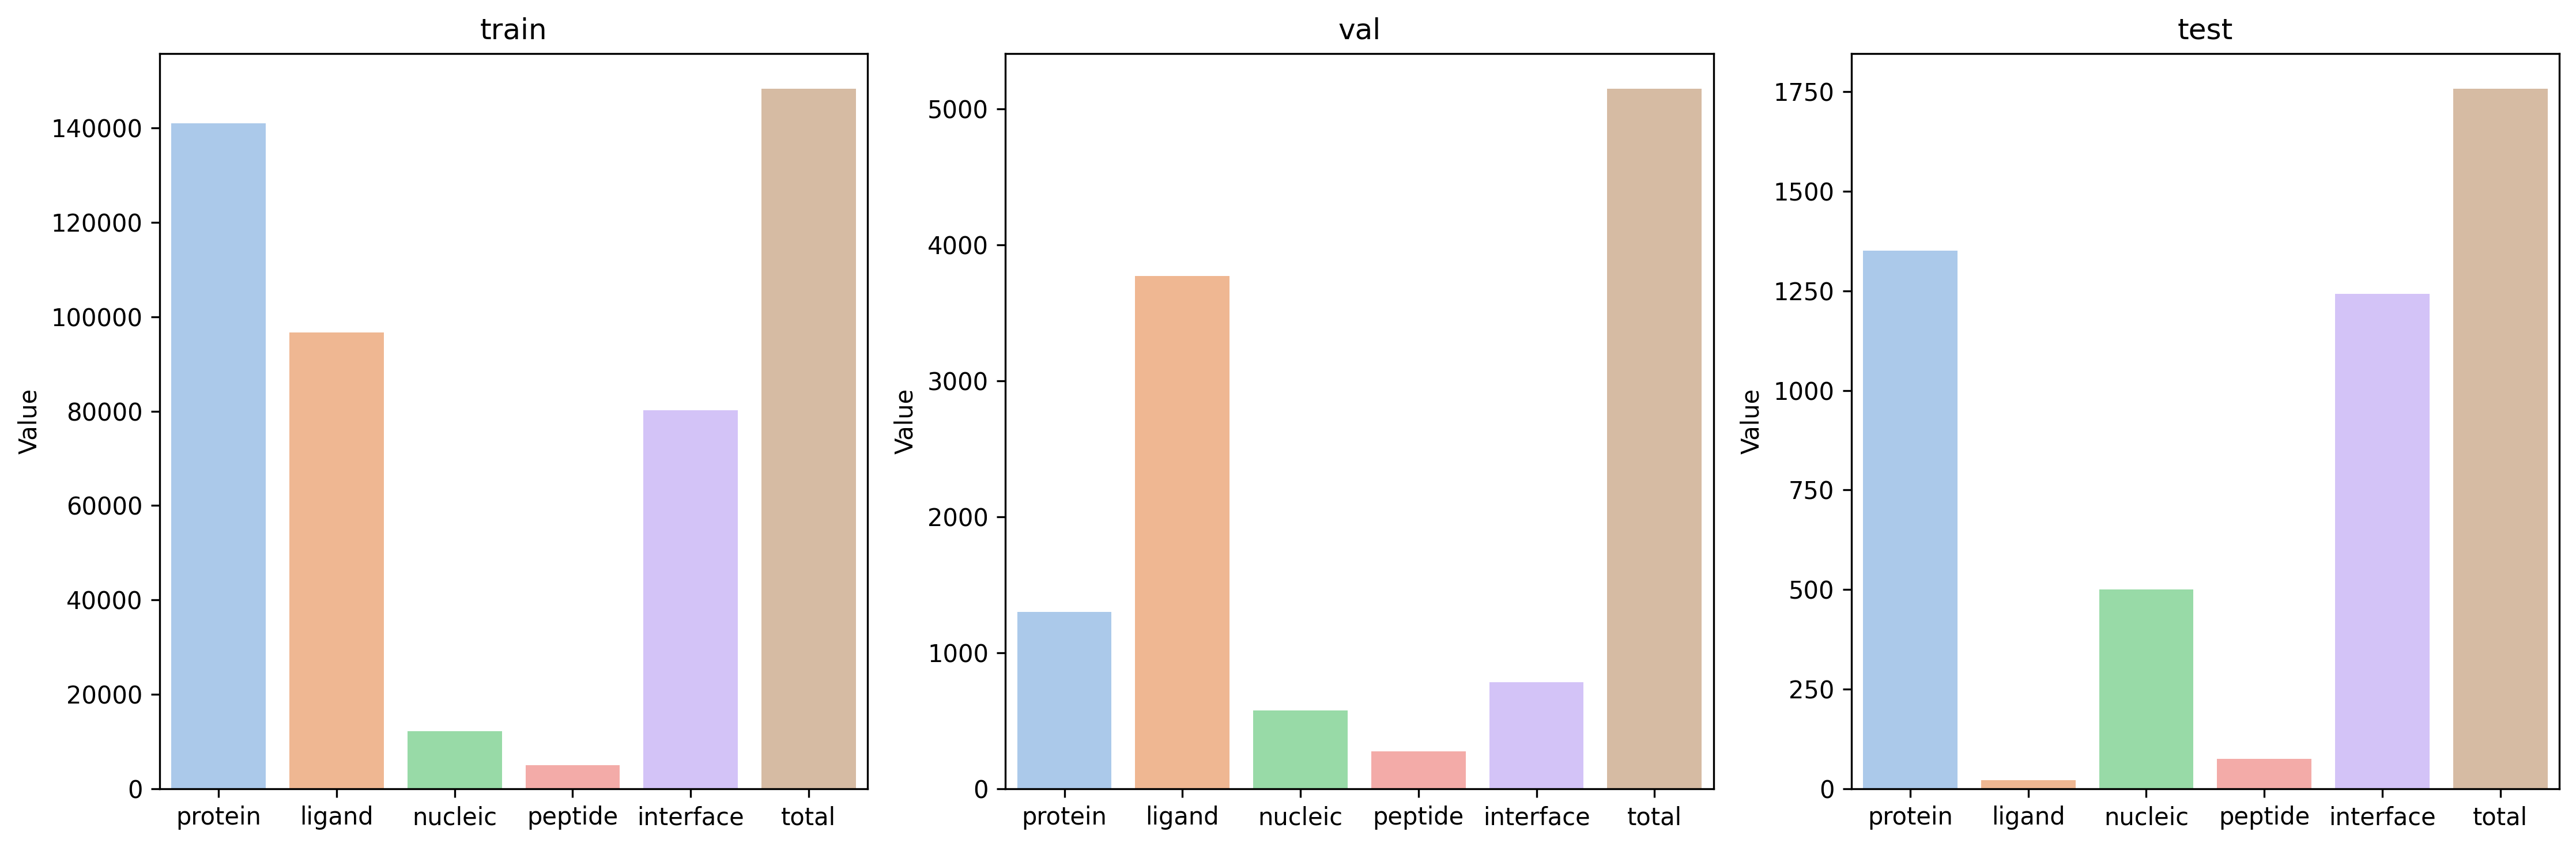

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the histogram using seaborn
# keys = 
fig, axes = plt.subplots(nrows=1, ncols=len(res.keys()), dpi=300, figsize=(15, 5))
for idx, key in enumerate(res.keys()):
    # Data for the histogram
    data = res[key]
    # Convert data to a list of tuples
    categories = list(data.keys())
    values = list(data.values())
    sns.barplot(x=categories, y=values, palette='pastel', ax=axes[idx])
    # axes[idx].set_xlabel('Category')
    axes[idx].set_ylabel('Value')
    axes[idx].set_title(f'{key}')
    # Rotate x-axis labels
    # axes[idx].set_xticklabels(categories, rotation=45)
plt.tight_layout()
plt.show()

